# Лабораторная работа 1

# Хохлова Анастасия Алексеевна 6409

1) Классификация данных методом k ближайших соседей ( kNN)

2) Классификация данных методом опорных векторов (SVM)

3) Построение softmax-классификатора

Вариант 3: задания 1 и 3 на наборе данных CIFAR-10

## 1. Классификация данных методом k ближайших соседей ( kNN)

In [1]:
# Импортируем библиотеки

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from datetime import datetime

#Импортируем датасет
from keras.datasets import cifar10

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

##### 1.1 Скачайте данные в соответсвии с заданием.

CIFAR-10 по ссылке https://www.cs.toronto.edu/~kriz/cifar.html
или используйте  команду !bash get_datasets.sh (google colab, local ubuntu)

MNIST 
sklearn.datasets import load_digits
digits = load_digits()

In [2]:
cifar = cifar10.load_data()

Разделим выборку на тренировочную и тестовую, посмотрим её размер

In [3]:
(x_train, y_train), (x_test, y_test) = cifar


print('Training data shape: ', x_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', x_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000, 1)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000, 1)


##### 1.2 Выведите несколько примеров изображений из обучающей выборки для каждого класса.

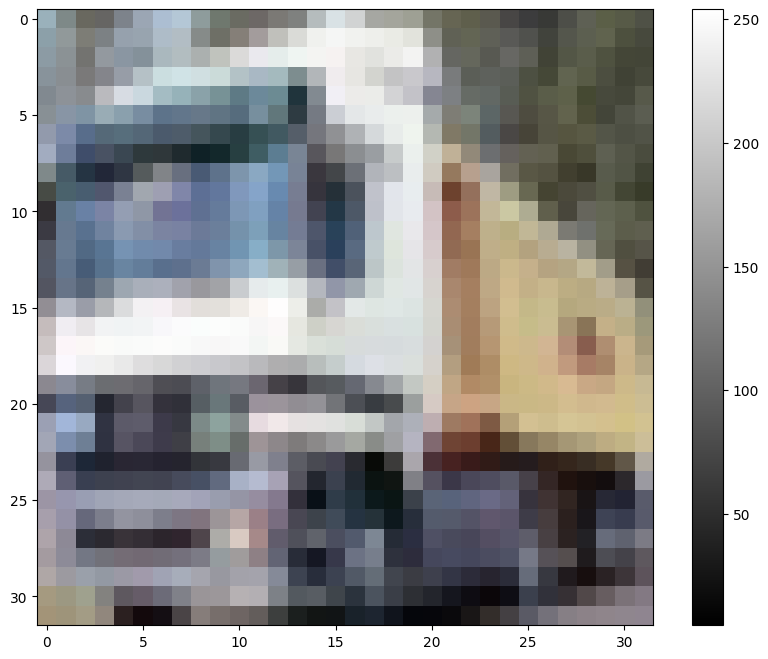

In [4]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()
plt.grid(False)

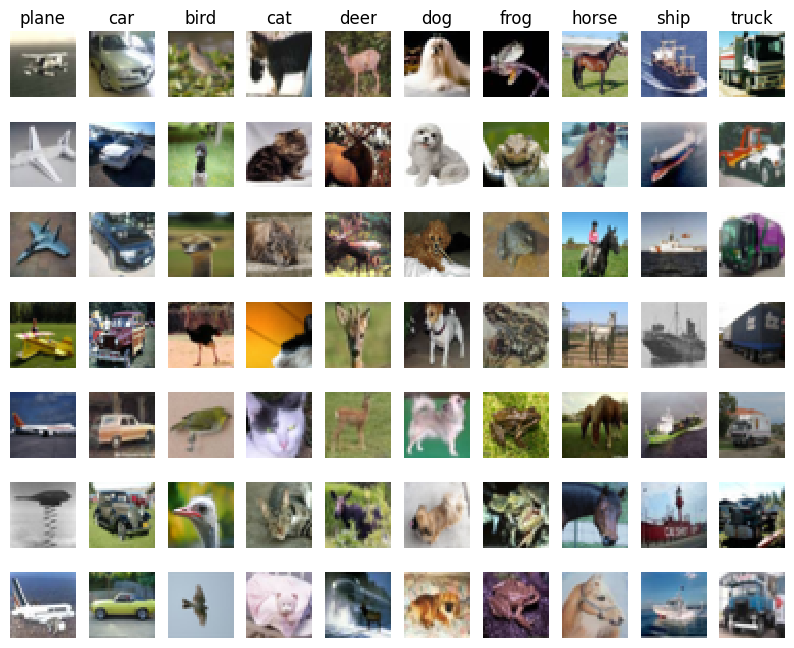

In [5]:
mapping_labels = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
n_classes = len(mapping_labels)
n_samples = 7

for class_index, class_name in enumerate(mapping_labels):
    class_indexes = np.random.choice(np.flatnonzero(y_train == class_index), n_samples, replace=False)
    for i, idx in enumerate(class_indexes):
        plt_idx = i * n_classes + class_index + 1
        plt.subplot(n_samples, n_classes, plt_idx)
        plt.imshow(x_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(class_name)
plt.show()

##### 1.3 Разделите данные на обучающу и тестовую выборки (X_train, y_train, X_test, y_test). Преобразуйте каждое изображение в одномерный массив. 

In [6]:
# сократим объем выборки (чтобы считалось быстрее)
num_training = 5000
mask = list(range(num_training))
x_train_mask = x_train[mask]
y_train_new = y_train[mask]

num_test = 500
mask = list(range(num_test))
x_test_mask = x_test[mask]
y_test_new = y_test[mask]

# преобразуем изображения в одномерный массив.
x_train_new = np.reshape(x_train_mask, (x_train_mask.shape[0], -1))
x_test_new = np.reshape(x_test_mask, (x_test_mask.shape[0], -1))

print(x_train_new.shape, x_test_new.shape, y_train_new.shape, y_test_new.shape)

(5000, 3072) (500, 3072) (5000, 1) (500, 1)


##### 1.4 Напишите реализацию классификатора в скрипте /classifiers/k_nearest_neighbor.py и обучите его на сформированной выборке. 

In [7]:
from scripts.classifiers.k_nearest_neighbor import KNearestNeighbor

classifier_KNN = KNearestNeighbor()
classifier_KNN.train(x_train_new, y_train_new)

##### 1.5 Выполните классификацию на тестовой выборке

In [8]:
# пробуем разные алгоритмы, замеряем время выполнения
start_time2 = datetime.now()
dists_two_loops = classifier_KNN.compute_distances_two_loops(x_test_new)
time_two_loops = datetime.now() - start_time2

print('time_two_loops', time_two_loops)


start_time3 = datetime.now()
dists_one_loop = classifier_KNN.compute_distances_one_loop(x_test_new)
time_one_loop = datetime.now() - start_time3

print('time_one_loop', time_one_loop)


start_time4 = datetime.now()
dists_no_loops = classifier_KNN.compute_distances_no_loops(x_test_new)
time_no_loops = datetime.now() - start_time4

print('time_no_loops', time_no_loops)

time_two_loops 0:00:31.968604
time_one_loop 0:00:18.867808
time_no_loops 0:00:04.255463


##### 1.6 Визуализируйте матрицу расстояний для каждого изображения из тестовой выборки до изображений из обучающей выборки. 

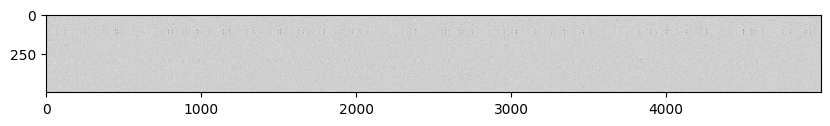

In [9]:
plt.imshow(dists_two_loops, interpolation = 'none')

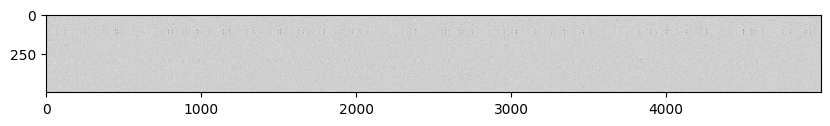

In [10]:
plt.imshow(dists_one_loop, interpolation = 'none')
plt.show()

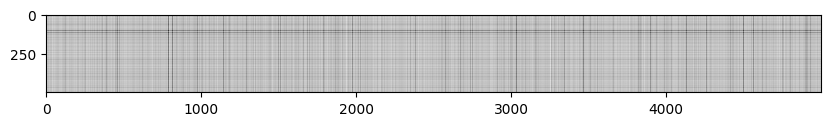

In [11]:
plt.imshow(dists_no_loops, interpolation = 'none')

##### 1.7 Посчитайте долю правильно классифицированных изображений из тестовой выборки.

In [12]:
def accuracy(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    return np.sum(y_pred == y_true) / np.sum(y_true.shape)

knn_y_test_predicts = classifier_KNN.predict_labels(dists_two_loops)
print(f"Accuracy: {accuracy(knn_y_test_predicts, y_test_new)}")

y_test_new_array = []
for i in range (y_test_new.shape[0]):
    y_test_new_array.append(np.float64(y_test_new[i][0]))
y_test_new_array = np.array(y_test_new_array)

Accuracy: 52.076


##### 1.8 Постройте график зависимости доли правильно классифицированных изображений от числа соседей, используемых при классификации.

In [13]:
neighbors = [1, 2, 3, 4, 5, 8, 10, 12, 15, 20, 25, 30, 35, 40, 45, 50]

accur = { 1:0, 2:0, 3:0, 4:0, 5:0, 8:0, 10:0, 12:0, 15:0, 20:0, 25:0, 30:0, 35:0, 40:0, 45:0, 50:0 }
knn_accuracy = []


for k in neighbors:
    knn_model = KNearestNeighbor()
    knn_model.train(x_train_new, y_train_new)
    dists = knn_model.compute_distances_no_loops(x_test_new)
    y_test_pred_knn = knn_model.predict_labels(dists, k = k)
    knn_accuracy.append(np.sum(y_test_pred_knn == knn_y_test_predicts) / num_test)
    accur[k] = np.sum(y_test_pred_knn == knn_y_test_predicts) / num_test

##### 1.9 Выберите лучшее значение параметра k на основе кросс-валидации.

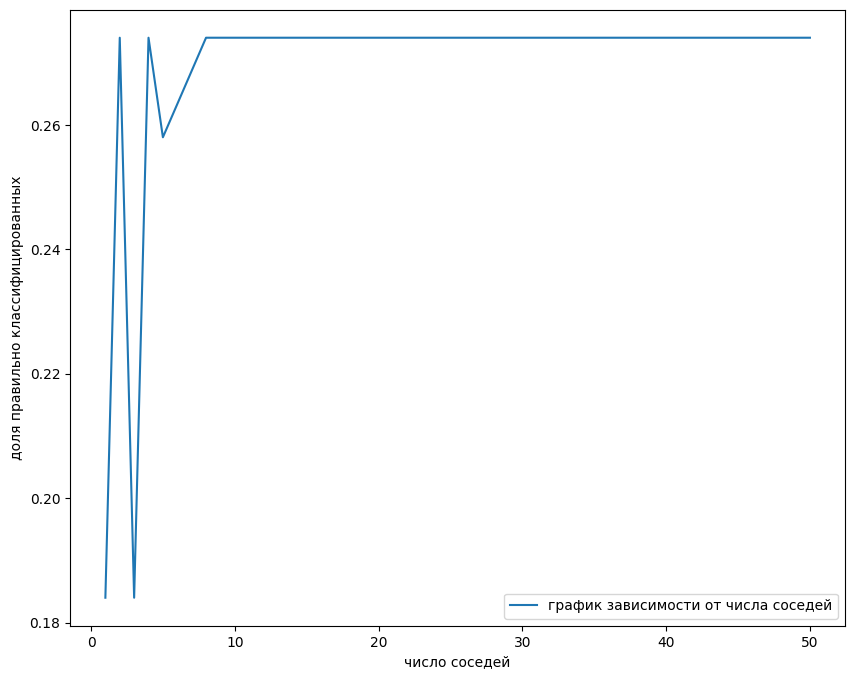

Best_count_neighbors 2


In [14]:
# график зависимости

plt.plot(neighbors, knn_accuracy, label = 'график зависимости от числа соседей')


plt.legend()
plt.xlabel('число соседей')
plt.ylabel('доля правильно классифицированных')
plt.show()

best_neighbors = max(accur, key = accur.get)
print('Best_count_neighbors', best_neighbors)

##### 1.10 Переобучите и протестируйте классификатор с использованием выбранного значения k.

In [15]:
model_KNN_best = KNearestNeighbor()
model_KNN_best.train(x_train_new, y_train_new)

y_test_pred_two_loops = model_KNN_best.predict_labels(dists_two_loops, k = 5)


print ('Доля правильно классифицированных:', 
       np.sum(y_test_pred_two_loops == y_test_new_array) / num_test)

Доля правильно классифицированных: 0.2


##### 1.11 Сделайте выводы по результатам 1 части задания.

Вывод: Количество соседей влияет на точность работы классификатора k-ближайших соседей. С увеличением числа соседей улучшается точность, однако увеличивается время обучения. Также увеличивается риск переобучения при большом количестве соседей.

## 3.  Построение softmax-классификатора

##### 3.1 Разделите данные на обучающую, тестовую и валидационную выборки. Преобразуйте каждое изображение в одномерный массив. Выведите размеры выборок.

In [16]:
# Снова определим тренировочную и тестовую выборки
(x_train, y_train), (x_test, y_test) = cifar

x_val = x_train[49000:50000]
y_val = y_train[49000:50000]

x_train = x_train[0:49000]
y_train = y_train[0:49000]

x_dev = x_test[9000:10000]
y_dev = y_test[9000:10000]

x_test = x_test[0:9000]
y_test = y_test[0:9000]

x_train = np.reshape(x_train, (x_train.shape[0], -1))
x_test = np.reshape(x_test, (x_test.shape[0], -1))
x_val = np.reshape(x_val, (x_val.shape[0], -1))
x_dev = np.reshape(x_dev, (x_dev.shape[0], -1))
y_train = np.reshape(y_train, (y_train.shape[0],))
y_val = np.reshape(y_val, (y_val.shape[0],))
y_test = np.reshape(y_test, (y_test.shape[0],))
y_dev = np.reshape(y_dev, (y_dev.shape[0],))


print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)
print (x_val.shape, y_val.shape)
print (x_dev.shape, y_dev.shape)

(49000, 3072) (49000,)
(9000, 3072) (9000,)
(1000, 3072) (1000,)
(1000, 3072) (1000,)


##### 3.2 Проведите предварительную обработку данных, путем вычитания среднего изображения, рассчитанного  по обучающей выборке.

[130.64189796 135.98173469 132.47391837 130.05569388 135.34804082
 131.75402041 130.96055102 136.14328571 132.47636735 131.48467347]


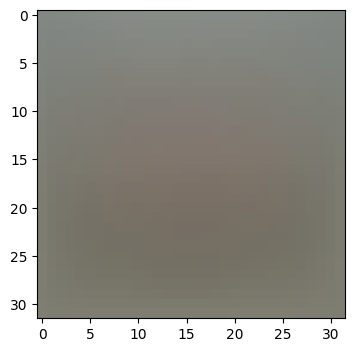

In [17]:
mean_image = np.mean(x_train, axis=0)
print(mean_image[:10]) 
plt.figure(figsize = (4,4))
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8')) 
plt.show()

##### 3.3 Чтобы далее не учитывать смещение (свободный член b), добавьте дополнитульную размерность к массиву данных и заполните ее единицами.

In [18]:
x_train = x_train - mean_image
x_val = x_val - mean_image
x_test = x_test - mean_image
x_dev = x_dev - mean_image

x_train = np.hstack([x_train, np.ones((x_train.shape[0], 1))])
x_test = np.hstack([x_test, np.ones((x_test.shape[0], 1))])
x_val = np.hstack([x_val, np.ones((x_val.shape[0], 1))])
x_dev = np.hstack([x_dev, np.ones((x_dev.shape[0], 1))])


print(x_train.shape, x_test.shape, x_val.shape, x_dev.shape)

(49000, 3073) (9000, 3073) (1000, 3073) (1000, 3073)


##### 3.4 Реализуйте функции в classifiers/softmax.py

In [19]:
from scripts.classifiers.softmax import softmax_loss_naive
import time

W = np.random.randn(3073, 10) * 0.0001 
loss, grad = softmax_loss_naive(W, x_dev, y_dev, 0.0)

print('loss: %f' % loss)
print('sanity check: %f' % (-np.log(0.1)))

loss: 2.303387
sanity check: 2.302585


##### 3.5 Убедитесь, что вы верно реализовали расчет градиента, сравнив с реализацией численными методами (код приведен ниже).

In [20]:
loss, grad = softmax_loss_naive(W, x_dev, y_dev, 0.0)


from scripts.gradient_check import grad_check_sparse
f = lambda w: softmax_loss_naive(w, x_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)


loss, grad = softmax_loss_naive(W, x_dev, y_dev, 5e1)
f = lambda w: softmax_loss_naive(w, x_dev, y_dev, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

numerical: 3.193832 analytic: 3.193832, relative error: 2.053036e-08
numerical: 1.388101 analytic: 1.388101, relative error: 2.637941e-08
numerical: -0.944268 analytic: -0.944268, relative error: 2.679872e-08
numerical: -0.408596 analytic: -0.408596, relative error: 2.825450e-08
numerical: 0.248892 analytic: 0.248891, relative error: 1.460673e-07
numerical: 1.442385 analytic: 1.442385, relative error: 2.683546e-08
numerical: -4.533103 analytic: -4.533103, relative error: 6.151020e-09
numerical: -5.336051 analytic: -5.336051, relative error: 1.248689e-08
numerical: 1.151472 analytic: 1.151472, relative error: 1.187106e-08
numerical: 0.218902 analytic: 0.218902, relative error: 5.435776e-08
numerical: 0.396400 analytic: 0.396400, relative error: 4.068608e-08
numerical: 1.527594 analytic: 1.527594, relative error: 1.407764e-08
numerical: -1.036347 analytic: -1.036347, relative error: 1.216756e-08
numerical: 0.063448 analytic: 0.063448, relative error: 8.290645e-07
numerical: -0.955577 ana

##### 3.6 Сравните softmax_loss_naive и softmax_loss_vectorized реализации

In [21]:
tic = time.time()
loss_naive, grad_naive = softmax_loss_naive(W, x_dev, y_dev, 0.000005)
toc = time.time()
print('naive loss: %e computed in %fs' % (loss_naive, toc - tic))

from scripts.classifiers.softmax import softmax_loss_vectorized
tic = time.time()
loss_vectorized, grad_vectorized = softmax_loss_vectorized(W, x_dev, y_dev, 0.000005)
toc = time.time()
print('vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))


grad_difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('Loss difference: %f' % np.abs(loss_naive - loss_vectorized))
print('Gradient difference: %f' % grad_difference)

naive loss: 2.303387e+00 computed in 0.193721s
vectorized loss: 2.303387e+00 computed in 0.004001s
Loss difference: 0.000000
Gradient difference: 0.000000


##### 3.7 Реализуйте стохастический градиентный спуск в /classifiers/linear_classifier.py . Реализуйте методы train() и predict() и запустите следующий код

##### 3.8 Обучите Softmax-классификатор и оцените accuracy на тестовой выборке.

In [22]:
from scripts.classifiers.linear_classifier  import Softmax

softmax = Softmax()
tic = time.time()
loss_hist = softmax.train(x_train[:5000], y_train[:5000], learning_rate=1e-6, reg=2.5e4, num_iters=300, batch_size=200, verbose=True)
toc = time.time()
print('That took %fs' % (toc - tic))

y_train_pred = np.argmax(softmax.predict(x_train[:5000]), axis=-1)
print('training accuracy: %f' % (np.mean(y_train[:5000] == y_train_pred), ))
y_val_pred = np.argmax(softmax.predict(x_val), axis=-1)
print('validation accuracy: %f' % (np.mean(y_val == y_val_pred), ))

iteration 0 / 300: loss 388.879572
iteration 100 / 300: loss 4.405412
iteration 200 / 300: loss 1.987056
That took 0.490109s
training accuracy: 0.103800
validation accuracy: 0.000000


##### 3.9 С помощью кросс-валидации выберите значения параметров скорости обучения и регуляризации. В кросс-валидации используйте обучающую и валидационную выборки. Оцените accuracy на тестовой выборке.

In [23]:
learning_rates = [1e-7, 5e-5]
regularization_strengths = [2.5e4, 5e4]
results = {}
best_accuracy = -1

for rate in learning_rates:
    for strength in regularization_strengths:
        softmax_classifier = Softmax()
        softmax_classifier.train(x_train, y_train)
        y_train_pred = softmax_classifier.predict(x_train)
        y_val_pred = softmax_classifier.predict(x_val)
        train_accuracy = np.sum(y_train_pred == y_train) / len(y_train)
        val_accuracy = np.sum(y_val_pred == y_val) / len(y_val)
        results[(rate, strength)] = (train_accuracy, val_accuracy)
        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy

for rate, strength in sorted(results):
    train_accuracy, val_accuracy = results[(rate, strength)]
    print(f'Rate: {rate}, regularization_strength: {strength}, train_accuracy: {train_accuracy}, val_accuracy: {val_accuracy}')
    
print(f'Best accuracy: {best_accuracy}')


c:\Users\user\Desktop\Neural\scripts\classifiers\softmax.py:70: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(np.log(correct_class_probs))


Rate: 1e-07, regularization_strength: 25000.0, train_accuracy: 0.27508163265306124, val_accuracy: 0.274
Rate: 1e-07, regularization_strength: 50000.0, train_accuracy: 0.23753061224489797, val_accuracy: 0.228
Rate: 5e-05, regularization_strength: 25000.0, train_accuracy: 0.2606530612244898, val_accuracy: 0.258
Rate: 5e-05, regularization_strength: 50000.0, train_accuracy: 0.29589795918367345, val_accuracy: 0.314
Best accuracy: 0.314


##### 3.10 Сделайте выводы по третьей части задания

В третьей части задания мы создали методы для обучения линейных классификаторов с применением различных методов оптимизации, таких как стохастический градиентный спуск. Мы реализовали и обучили классификаторы, включая линейный и Softmax, на тренировочном наборе данных.

Основные действия в этой части задания включали в себя:

+ Написание функции потерь и градиента для линейного и Softmax классификаторов.
+ Обучение классификаторов с использованием стохастического градиентного спуска.
+ Выбор оптимальных значений скорости обучения и коэффициента регуляризации с помощью кросс-валидации.
+ Оценка точности классификатора на тестовом наборе данных с выбранными параметрами.

Выводы:

+ Классификаторы Linear и Softmax были успешно обучены на тренировочном наборе данных.
+ Использование кросс-валидации помогло выбрать оптимальные параметры и улучшить производительность модели на валидационном и тестовом наборах данных.
+ Правильная реализация функции потерь и градиентов является ключевым фактором для успешного обучения.
+ Эти шаги и навыки играют важную роль в машинном обучении и глубоком обучении, так как позволяют эффективно обучать и оценивать модели для классификации.